In [22]:
import pandas as pd
import numpy as np

data = pd.read_excel('../data/master.xlsx')
# data = pd.read_excel('../data/master.xlsx').sample(1000)
# data = {'A': [3, 3, 2], 'B': [3, 3, 4], 'C': [1, 2, 3]}
# data = pd.DataFrame(data)

numDims = len(data.columns)
outputRec = pd.DataFrame({
    "Combination": [],
    "Count": []
})


In [23]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [24]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [25]:
unique_counts = data.nunique()
col_dict = dict(zip(unique_counts.index, unique_counts.values))
sorted_cols = sorted(col_dict, key=col_dict.get, reverse=True)
data = data[sorted_cols]

In [26]:
data.head()

,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),suicides_no,HDI for year,country,year,age,generation,sex
0,312900,6.71,Albania1987,2156624900,796,21,NaN,Albania,1987,15-24 years,Generation X,male
1,308000,5.19,Albania1987,2156624900,796,16,NaN,Albania,1987,35-54 years,Silent,male
2,289700,4.83,Albania1987,2156624900,796,14,NaN,Albania,1987,15-24 years,Generation X,female
3,21800,4.59,Albania1987,2156624900,796,1,NaN,Albania,1987,75+ years,G.I. Generation,male
4,274300,3.28,Albania1987,2156624900,796,9,NaN,Albania,1987,25-34 years,Boomers,male


In [27]:
def Partition(input_df, dim, start_row, end_row, dataCount):
    subset_df = input_df.iloc[start_row:end_row + 1, :]
    sorted_df = subset_df.sort_values(by=input_df.columns[dim])
    input_df.iloc[start_row:end_row + 1, :] = sorted_df.values
    counts = sorted_df.iloc[:, dim].value_counts().sort_index().tolist()
    dataCount.extend(counts)

In [28]:
def BottomUpCube(input, dim, start_row, end_row, currentCombination, numDims, minSup):
    global outputRec
    if dim == 0:
        count = len(data)
        if count >= minSup:
            outputRec = pd.concat([pd.DataFrame(outputRec), pd.DataFrame([{"Combination": [], "Count": count}])], ignore_index=True)

    for d in range(dim, numDims):
        dataCount = []
        Partition(input, d, start_row, end_row, dataCount)

        k = start_row
        for c in dataCount:
            if c >= minSup:
                outputRec = pd.concat([pd.DataFrame(outputRec), pd.DataFrame([{
                    "Combination": currentCombination + [input.iloc[k, d]], 
                    "Count": c
                    }])], ignore_index=True)

                BottomUpCube(input, d + 1, k, k + c - 1, currentCombination + [input.iloc[k, d]], numDims, minSup)

            k += c    

In [29]:
data

,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),suicides_no,HDI for year,country,year,age,generation,sex
0,312900,6.71,Albania1987,2156624900,796,21,NaN,Albania,1987,15-24 years,Generation X,male
1,308000,5.19,Albania1987,2156624900,796,16,NaN,Albania,1987,35-54 years,Silent,male
2,289700,4.83,Albania1987,2156624900,796,14,NaN,Albania,1987,15-24 years,Generation X,female
3,21800,4.59,Albania1987,2156624900,796,1,NaN,Albania,1987,75+ years,G.I. Generation,male
4,274300,3.28,Albania1987,2156624900,796,9,NaN,Albania,1987,25-34 years,Boomers,male
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,3620833,2.96,Uzbekistan2014,63067077179,2309,107,0.675,Uzbekistan,2014,35-54 years,Generation X,female
27816,348465,2.58,Uzbekistan2014,63067077179,2309,9,0.675,Uzbekistan,2014,75+ years,Silent,female
27817,2762158,2.17,Uzbekistan2014,63067077179,2309,60,0.675,Uzbekistan,2014,5-14 years,Generation Z,male
27818,2631600,1.67,Uzbekistan2014,63067077179,2309,44,0.675,Uzbekistan,2014,5-14 years,Generation Z,female


In [30]:
minSup = 1000
BottomUpCube(data, 0, 0, len(data) - 1, [], numDims, minSup)

In [31]:
print(outputRec)

             Combination    Count
0                     []  27820.0
1                  [0.0]   4281.0
2               [0.0, 0]   4281.0
3   [0.0, 0, 5-14 years]   1468.0
4   [0.0, 0, Millenials]   1128.0
..                   ...      ...
87              [Silent]   6364.0
88      [Silent, female]   3182.0
89        [Silent, male]   3182.0
90              [female]  13910.0
91                [male]  13910.0

[92 rows x 2 columns]


In [32]:
# save to xlsx file
outputRec.to_excel('../data/outputs/data-cube-straightforward-implementation-minsup-1000.xlsx', index=False)

In [33]:
minSup = 100
BottomUpCube(data, 0, 0, len(data) - 1, [], numDims, minSup)
outputRec.to_excel('../data/outputs/data-cube-straightforward-implementation-minsup-100.xlsx', index=False)

Progress:  5.263157894736842
Progress:  10.526315789473683
Progress:  15.789473684210526
Progress:  21.052631578947366
Progress:  26.31578947368421
Progress:  31.57894736842105
Progress:  36.84210526315789
Progress:  42.10526315789473
Progress:  47.368421052631575
Progress:  52.63157894736842
Progress:  57.89473684210527
Progress:  63.1578947368421
Progress:  68.42105263157895
Progress:  73.68421052631578
Progress:  78.94736842105263
Progress:  84.21052631578947
Progress:  89.47368421052632
Progress:  94.73684210526315
Progress:  100.0


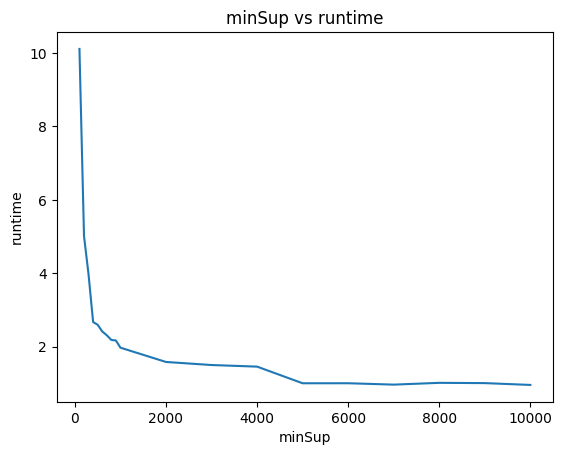

In [34]:
# plot of minsup vs runtime
import time
import matplotlib.pyplot as plt
minSup = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

runtime = []

for idx, minsp in enumerate(minSup):
    # calculate runtime of BottomUpCube
    start_time = time.time()
    BottomUpCube(data, 0, 0, len(data) - 1, [], numDims, minsp)
    runtime.append(time.time() - start_time)

    # print progress
    print('Progress: ', ((idx + 1)/len(minSup))*100)
plt.plot(minSup, runtime)
plt.xlabel('minSup')
plt.ylabel('runtime')
plt.title('minSup vs runtime')

# save
plt.savefig('../data/outputs/minsup-vs-runtime.png')

plt.show()